# DataCamp Certification Case Study

### Project Brief

Congratulations, you have just landed your first job as a data scientist at Nearly New Nautical! Nearly New Nautical is a website that allows users to advertise their used boats for sale. To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views. 

The product manager wants to know if you can develop a model to predict the number of views a listing will receive based on the boat's features. She would consider using your model if, on average, the predictions were only 50% off of the true number of views a listing would receive.

In addition, she has noticed that many users never complete the introductory survey to list their boat. She suspects that it is too long and has asked you whether some features are more predictive of views than others. If so, she may be able to trim the length of the survey and increase the number of people who sign up.

You will need to present your findings in two formats:
- First, you will need to present your findings to the product manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/boat_data.csv"`

# 0.Import Libs and Read DataSet

In [ ]:
## import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Read dataset
data_url = "data/boat_data.csv"
data = pd.read_csv(data_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


<AxesSubplot:title={'center':'Numbers of non-null values'}, xlabel='Features', ylabel='Sample'>

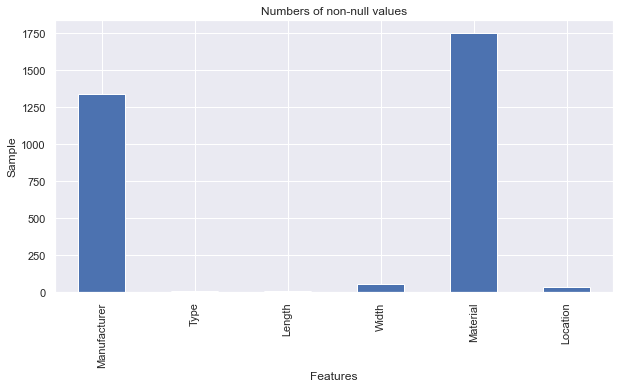

In [ ]:
sns.set()
plt.figure(figsize=(10,5))
plt.title("Numbers of non-null values")

plt.xlabel("Features")
plt.ylabel("Sample")

data.isna().sum()[data.isna().sum()>0].plot(kind='bar')

**Comment:**
- This dataset have 9888 sample and 10 feature 
- Each model is the boat's characteristics such as height, width, material,... outcome is number of view in website 
- Dataset have a lots non-null values

**Solution:**
- In this case I will process data after that i use machine learning model



#1. Data validation
  1. Change the currency
  2. Convert feature to categorical
  3. Fill nan values
  4. Prepare Location feature

## 1.1 Change the currency

In [ ]:
df = data.copy()

In [ ]:
df[['Curency', 'Val']] = df['Price'].str.split(' ', 1, expand=True)
df["Val"] = df.Val.astype("float")

In [ ]:
df["Curency"].unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [ ]:
Ammout = {"CHF": 1.03,"EUR": 1.02, "DKK": 0.14, "Â£":1.20}
df["Ammout"] = df["Curency"].replace(Ammout)
df["USD_Price"] = df['Val']* df["Ammout"]

**Comment:** In this part i was convert currency rate to USD by separating the rate and value from the Price column then multiplying the rate by the following ratio "CHF": 1.03,"EUR": 1.02, "DKK": 0.14, "Â£":1.20 (Update July - 2022)

## 1.3 Fill nan values

In [ ]:
df[['Manufacturer', 'Material']] = df[['Manufacturer', 'Material']].fillna(value='none')
df = df.dropna()
(df.isnull().sum()/len(df)).sort_values()

Price                          0.0
Boat Type                      0.0
Manufacturer                   0.0
Type                           0.0
Year Built                     0.0
Length                         0.0
Width                          0.0
Material                       0.0
Location                       0.0
Number of views last 7 days    0.0
Curency                        0.0
Val                            0.0
Ammout                         0.0
USD_Price                      0.0
dtype: float64

**Comment:** I was deal with nan values by none values and drop the rest

##1.3 Convert feature to categorical

In [ ]:
features = ['Boat Type',	'Manufacturer',	'Type',	'Material']

In [ ]:
for col in features:
  df[col] = df[col].astype("category")
  

## 1.4 Prepare Location feature

In [ ]:
print(f"Countries : {len(df['Location'].str.split('Â»', expand=True)[0].str.strip().unique())}")

Countries : 119


In [ ]:
df['Country'] = df['Location'].str.split('Â»', expand=True)[0].str.strip()

In [ ]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Curency,Val,Ammout,USD_Price,Country
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,none,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337.0,1.03,3437.11,Switzerland
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490.0,1.02,3559.80,Germany
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770.0,1.03,3883.10,Switzerland
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,none,Denmark Â» Svendborg,64,DKK,25900.0,0.14,3626.00,Denmark
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399.0,1.02,3466.98,Germany


**Comment:** In Location feature we can see it are composed of Country and string “Â>>” so i split and get 0 index to get Country

In [ ]:
for col in ['Price','Location','Curency','Val','Ammout']:
  df = df.drop(col,axis=1)

In [ ]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,USD_Price,Country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,none,226,3437.11,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3559.80,Germany
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3883.10,Switzerland
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,none,64,3626.00,Denmark
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3466.98,Germany


**Comment:** Finally i drop unrelated features 

# 2. Exploratory Data Analysis

In [ ]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days,USD_Price
count,9790.000000,9790.000000,9790.000000,9790.000000,9.790000e+03
mean,1892.499387,11.537413,3.514004,149.366803,3.071689e+05
std,461.575903,5.970952,1.213858,152.243472,9.919489e+05
min,0.000000,1.040000,0.010000,13.000000,3.366000e+03
25%,1996.000000,7.460000,2.540000,70.000000,4.385235e+04
50%,2007.000000,10.245000,3.320000,108.000000,9.384000e+04
75%,2017.000000,13.900000,4.250000,172.000000,2.499000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.162000e+07


In [ ]:
df.describe(include=['category'])


,Boat Type,Manufacturer,Type,Material
count,9790,9790,9790,9790
unique,126,908,24,12
top,Motor Yacht,none,"Used boat,Diesel",GRP
freq,2676,1314,4084,5436


In [ ]:
# list categorical features
cat_cols = ['Boat Type','Manufacturer', 'Type', 'Material', 'Country']

for col in cat_cols:
    # create frequency map
    df_frequency_map = df[col].value_counts().to_dict()
    # map frequency
    df[col] = df[col].map(df_frequency_map)

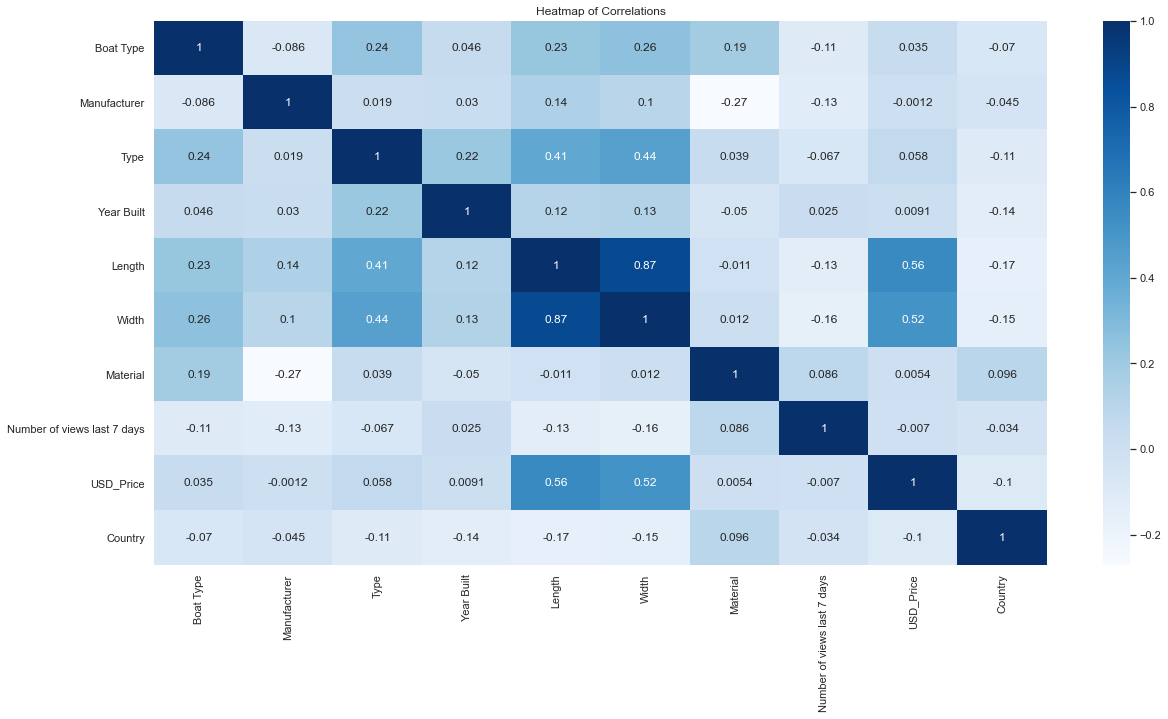

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title('Heatmap of Correlations');

<Figure size 1440x720 with 0 Axes>

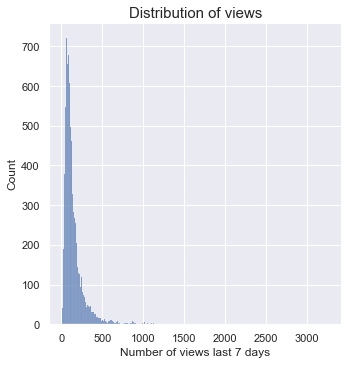

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(df['Number of views last 7 days'])
plt.title('Distribution of views', size=15);

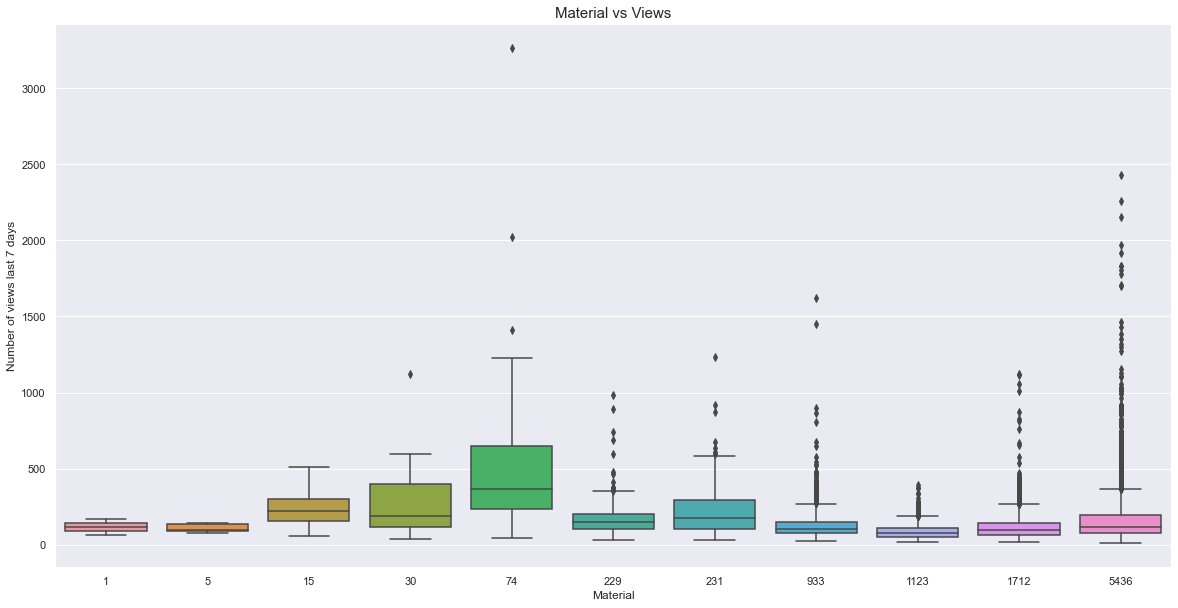

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='Material', y='Number of views last 7 days')
plt.title('Material vs Views', size=15);

<AxesSubplot:title={'center':'Views under 750'}>

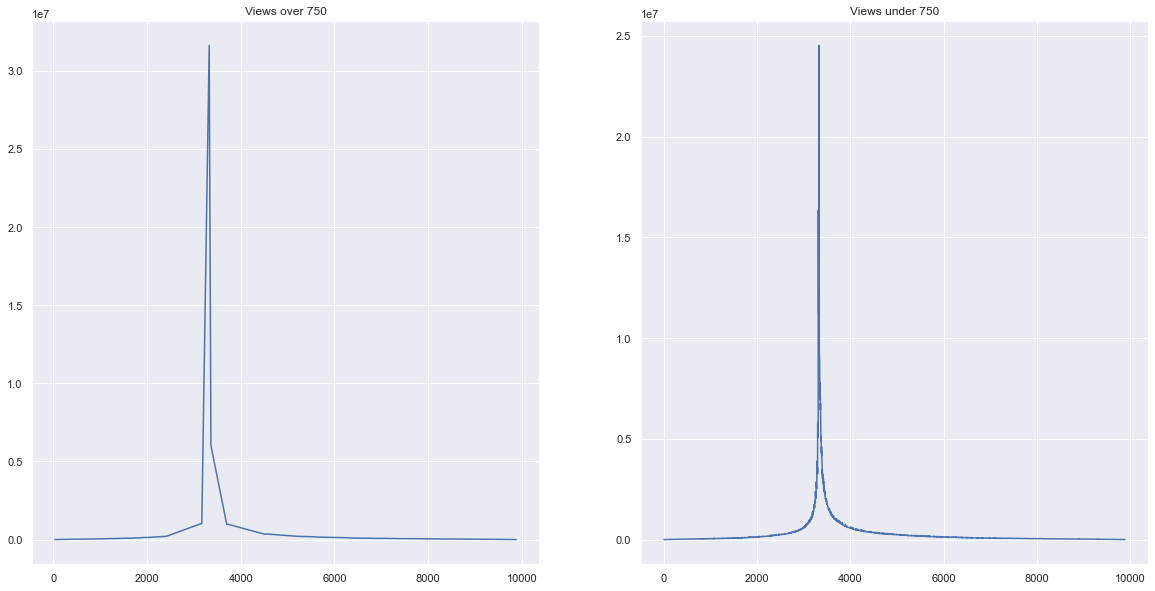

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
df[df['Number of views last 7 days'] > 750]['USD_Price'].plot(title='Views over 750')
plt.subplot(1,2,2)
df[df['Number of views last 7 days'] < 750]['USD_Price'].plot(title='Views under 750')

# 3. Model Development

**Comment** According to this data, I have suggested neural network for main model because features do not have high similarity and when combined cannot give discrete results so NLPRegressor is model most optimization.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
model = MLPRegressor((100,10,1))

In [ ]:
X = df.drop('Number of views last 7 days', axis=1)
y = df['Number of views last 7 days']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.7)

In [ ]:
model.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(100, 10, 1))

# 4. Evaluate model

In [ ]:
print(f'Mean Absolute Error: {mean_absolute_error(model.predict(X_test),y_test)}')
print(f'Mean Absolute Percentage Error: {np.round(mean_absolute_percentage_error(y_test, model.predict(X_test))*100,0)}%')

Mean Absolute Percentage Error: 145.33693199611608
Mean Absolute Percentage Error: 94.0%


**Results:** 
From the trained model, the average result on the evaluation set is: 94% (sucess)

# 5. Summary

In this report i was read and process dataset include: deal nan values, process string feature, ...

After that i was plot some features useful from that to suggest the optimal algorithm model is Neural Network

Finally i was training model and evaluate with test dataset.

My result were very good: 94% exceeded business expectations by 50%





******

*report:* *by Vo Thanh Hoang Son aka Sho*